<a href="https://colab.research.google.com/github/adyasha95/feature-tracking-opencv-demos/blob/main/corner_detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Photo on 01.02.25 at 15.49.jpg to Photo on 01.02.25 at 15.49.jpg


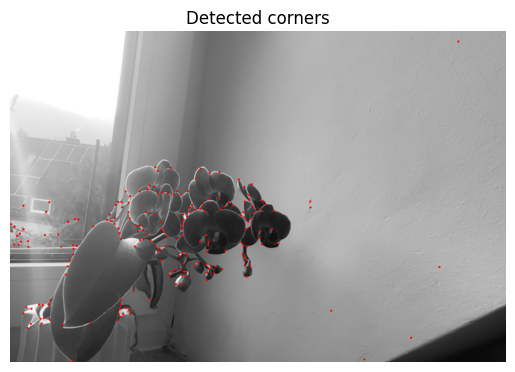

In [ ]:
#!/usr/bin/env python3
"""
Shi–Tomasi corner detection demo.

Usage:
  python corner_detection.py --image path/to/image.jpg
(If running in Google Colab, you can omit --image to use the upload dialog.)
"""

import argparse
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_image_gray(path: str | None):
    if path:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        assert img is not None, f"Failed to read image at: {path}"
        return img

    # Fallback for Google Colab upload
    try:
        from google.colab import files  # type: ignore
        print("No --image provided. Open the upload dialog…")
        uploaded = files.upload()
        fname = next(iter(uploaded.keys()))
        img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
        assert img is not None, "Failed to read the uploaded image."
        return img
    except Exception:
        raise SystemExit("Please provide --image <path> when not in Colab.")

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--image", type=str, default=None, help="Path to an image file")
    parser.add_argument("--max_corners", type=int, default=200)
    parser.add_argument("--quality", type=float, default=0.01)
    parser.add_argument("--min_dist", type=int, default=10)
    args = parser.parse_args()

    img = load_image_gray(args.image)

    # Detect corners (Shi–Tomasi)
    corners = cv2.goodFeaturesToTrack(
        img,
        maxCorners=args.max_corners,
        qualityLevel=args.quality,
        minDistance=args.min_dist,
        blockSize=7,
    )
    if corners is None:
        raise SystemExit("No corners found. Try lowering --quality or using a more textured image.")
    corners = np.int32(corners)

    # Draw
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for c in corners:
        x, y = c.ravel()
        cv2.circle(vis, (int(x), int(y)), 3, (0, 0, 255), -1)

    # Show with matplotlib (works everywhere)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title("Shi–Tomasi: Detected Corners")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()